In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
import pandas as pd

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

def getArrays(tree):

    chi2 = np.zeros(tree.GetEntries())
    dm2 = np.zeros(tree.GetEntries())
    sin22th = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        chi2[j] = tree.chi2
        dm2[j] = tree.dm2
        sin22th[j] = tree.sin22th
    
    return chi2, dm2, sin22th

def getContour(tree):

    dm2 = np.zeros(tree.GetEntries())
    sin22th = np.zeros(tree.GetEntries())
    
    for j in range(tree.GetEntries()):
        tree.GetEntry(j)
        
        dm2[j] = tree.dm2
        sin22th[j] = tree.sin22th
    
    adm2 = np.asarray(dm2)
    asin22th = np.asarray(sin22th)


    cosin22th = np.zeros(len(np.unique(adm2)))
    codm2 = np.zeros(len(np.unique(adm2)))

    for i in range(len(np.unique(adm2))):
        indy = np.argmin(asin22th[adm2==adm2[i]])
        cosin22th[i] = asin22th[adm2==np.unique(adm2)[i]][indy]
        codm2[i] = np.unique(adm2)[i]    
    
    return cosin22th, codm2

Welcome to JupyROOT 6.18/04


AttributeError: 'TObject' object has no attribute 'GetEntries'

Error in <TFile::TFile>: file ../apr28freqtest/ubsens_sr_proc_v1.root does not exist


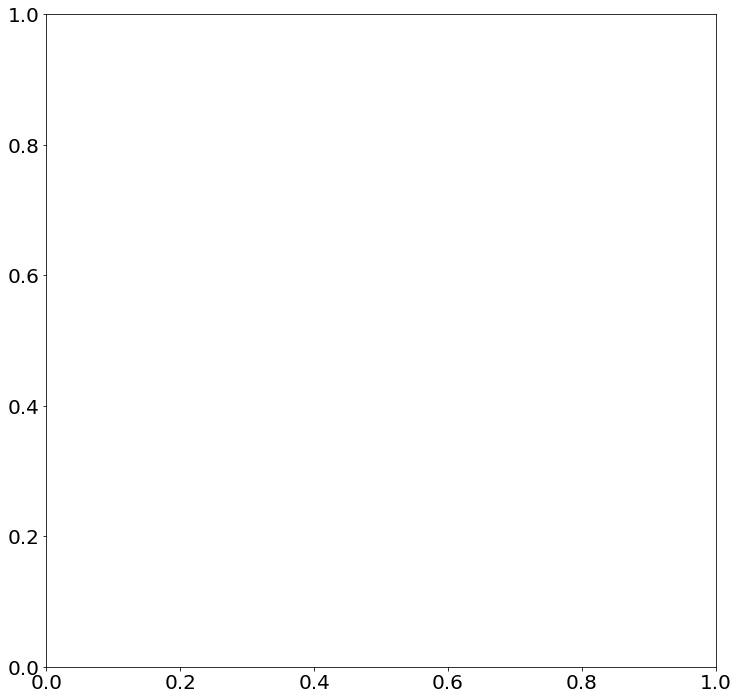

In [2]:
fig, ax = plt.subplots(figsize=(12,12))

mbnudis_90cl=np.genfromtxt("limits/ubsens_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle=":",linewidth=4,zorder=-1)

plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE Excluded (SO)')

f = ROOT.TFile("../apr28freqtest/ubsens_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContour(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='dodgerblue',linewidth=3,label=r'MicroBooNE (S+R)')

f = ROOT.TFile("../apr28freqtest/ubsens_so_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContour(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='navy',linewidth=3,label=r'MicroBooNE (SO)')

plt.annotate('No Frequentist Correction',xy=(0.1, .36), xycoords='axes fraction',fontsize=35)
ax.set_title(r'$\nu_\mu$ Disappearance 90% CL',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

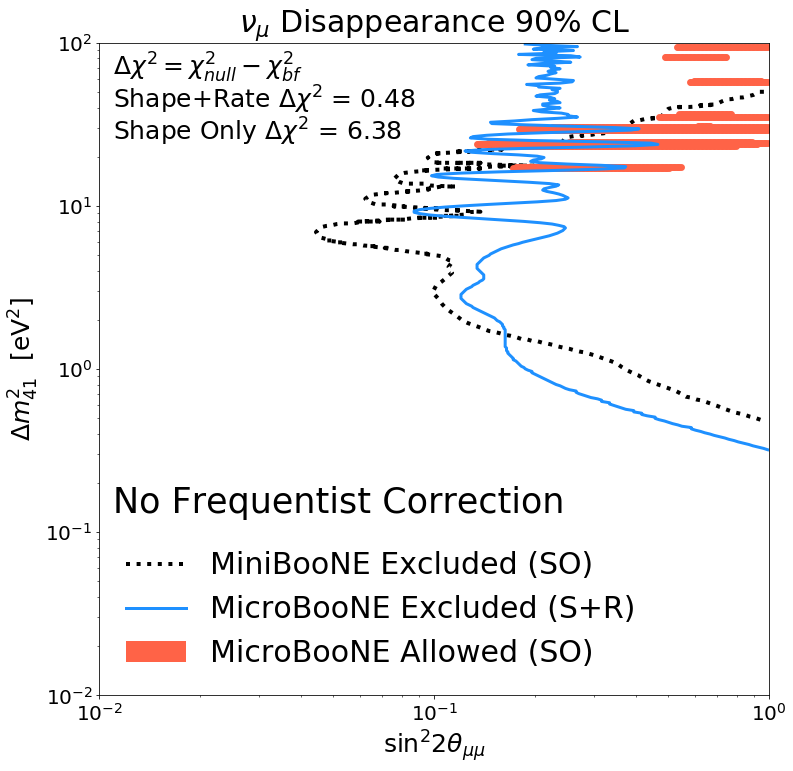

In [46]:
fig, ax = plt.subplots(figsize=(12,12))

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle=":",linewidth=4,zorder=-1)

plt.plot([0],[0],color='black',linestyle=':',linewidth=4,label='MiniBooNE Excluded (SO)')

f = ROOT.TFile("../apr28freqtest/ublim_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContour(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='dodgerblue',linewidth=3,label=r'MicroBooNE Excluded (S+R)')

f = ROOT.TFile("../apr28freqtest/ublim_so_proc_v1.root")
tchi_95 = f.Get("numudis_90")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.scatter(sin22th_95,dm2_95,s=msize,c='tomato',linewidth=3)

plt.hist([0],range=(0,0.0001),color='tomato',label=r'MicroBooNE Allowed (SO)')

plt.annotate('No Frequentist Correction',xy=(0.02, .28), xycoords='axes fraction',fontsize=35)
ax.set_title(r'$\nu_\mu$ Disappearance 90% CL',fontsize=30)
ax.legend(fontsize=30,frameon=False,loc='lower left')

plt.annotate(r'$\Delta \chi^2 = \chi^2_{null} - \chi^2_{bf}$',xy=(0.02, .95), xycoords='axes fraction',fontsize=25)
plt.annotate(r'Shape+Rate $\Delta \chi^2$ = %.2f'%(14.09-13.61),xy=(0.02, .9), xycoords='axes fraction',fontsize=25)
plt.annotate(r'Shape Only $\Delta \chi^2$ = %.2f'%(13.26-6.88),xy=(0.02, .85), xycoords='axes fraction',fontsize=25)


plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../build/ubLim_fine_sr_apr1_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='rebeccapurple',linewidth=3,label='UB 90% CL Raster Scan Limit')


f = ROOT.TFile("../build/ubSens_fine_sr_apr1_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='magenta',linewidth=3,label='UB 90% CL Raster Scan Sens')


ax.set_title(r'$\nu_\mu$ Disappearance',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../build/ubLimVeryfine_Apr16_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='rebeccapurple',linewidth=3,label='UB 90% CL Raster Scan (S+R)')


f = ROOT.TFile("../build/ubLimVeryfine_SO_Apr16_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='magenta',linewidth=3,label='UB 90% CL Raster Scan (SO)')


ax.set_title(r'$\nu_\mu$ Disappearance Limit',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../build/ubSensVeryfine_Apr16_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='rebeccapurple',linewidth=3,label='UB 90% CL Raster Scan (S+R)')


f = ROOT.TFile("../build/ubSensVeryfine_SO_Apr16_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='magenta',linewidth=3,label='UB 90% CL Raster Scan (SO)')


ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
allowed_90_dm2_freq = []
allowed_90_sin22th_freq = []

allowed_99_dm2_freq = []
allowed_99_sin22th_freq = []

allowed_1sig_dm2_freq = []
allowed_1sig_sin22th_freq = []


chi2min = 21.84

for i,chisq in enumerate(chi2_c):
    chi2crit_90 = fu90(sin22th_c[i],dm2_c[i])
    chi2crit_99 = fu99(sin22th_c[i],dm2_c[i])
    chi2crit_1sig = fu1sig(sin22th_c[i],dm2_c[i])
    if chisq - chi2min < chi2crit_90:
        allowed_90_dm2_freq.append(dm2_c[i])
        allowed_90_sin22th_freq.append(sin22th_c[i])
    if chisq - chi2min < chi2crit_99:
        allowed_99_dm2_freq.append(dm2_c[i])
        allowed_99_sin22th_freq.append(sin22th_c[i])
    if chisq - chi2min < chi2crit_1sig:
        allowed_1sig_dm2_freq.append(dm2_c[i])
        allowed_1sig_sin22th_freq.append(sin22th_c[i])

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

plt.scatter(allowed_1sig_sin22th_freq,allowed_1sig_dm2_freq,s=75,label=r'$1\sigma$ Allowed',c='salmon')
plt.scatter(allowed_90_sin22th_freq,allowed_90_dm2_freq,s=75,label='90% Allowed',c='maroon')
plt.scatter(allowed_99_sin22th_freq,allowed_99_dm2_freq,s=75,label='99% Allowed',c='mistyrose')

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()], color='black',  linestyle=":",linewidth=3,label='MB 90% Exclusion')

#plt.annotate('Shape Only',xy=(0.1, .32), xycoords='axes fraction',fontsize=35)
ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
np.sqrt(0.017)

In [ ]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

a_data = np.asarray((0, 9.01169, 92.2784, 146.565, 240.663, 269.41, 343.899, 364.108, 347.815, 319.224, 282.653, 263.853, 221.32, 205.485, 170.267, 127.866, 91.3127, 69.7602, 68.9559, 60.9471))
a_pred = np.asarray((0, 11.287, 82.43, 157.198, 245.81, 261.512, 336.863, 364.936, 349.238, 322.009, 282.267, 259.343, 221.949, 213.442, 169.51, 126.57, 91.2616, 72.5078, 67.132, 60.1311))
a_err = np.asarray((0, 5.22783, 21.6516, 31.8734, 47.0232, 45.443, 52.7875, 55.7596, 52.3227, 48.591, 41.2094, 38.5114, 33.2213, 31.6578, 29.6215, 22.9104, 17.6577, 16.9072, 16.8557, 15.6809))
a_bins = np.asarray((200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200))


sin22th = 0.8
dm2 = 84
chisq = 3.64

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
bincenters = a_bins[:-1] + np.diff(a_bins)/2


_ = plt.hist(bincenters,bins=a_bins,weights=a_pred)
_ = plt.errorbar(bincenters,a_data,yerr=np.sqrt(a_data),fmt='.')




errboxes_tot = []

for i in range(len(bincenters)):
    rect1 = Rectangle((a_bins[i],(a_pred[i]-a_err[i])),a_bins[i+1]-a_bins[i],a_err[i]*2)
    errboxes_tot.append(rect1)
pc_tot = PatchCollection(errboxes_tot,facecolor='red',alpha=.1,hatch='/',zorder=12)
ax.add_collection(pc_tot)

ax.set_xlabel('Reconstructed Neutrino Energy',fontsize=20)
ax.set_title('Null Spectrum',fontsize=30)
ax.annotate(r'$\sum$data/$\sum$pred = %.2f'%(a_data.sum()/float(a_pred.sum())),xy=(.01,.92),xycoords='axes fraction',fontsize=20,bbox=dict(boxstyle="square", fc="ghostwhite",alpha=.8))
plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f eV^2$'%(sin22th,dm2),xy=(0.2, .2), xycoords='axes fraction',fontsize=30)
plt.annotate(r'$\chi^2=%.2f$'%(chisq),xy=(0.2, .1), xycoords='axes fraction',fontsize=30)

plt.xlim(a_bins[0],a_bins[-1])

In [ ]:
mb_fracsys = np.genfromtxt('../data/miniboone_dis/miniboone_frac_shape_matrix_numu_disap.txt')

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))

ax.set_title('MiniBooNE Fractional Systematic Cov Matrix',fontsize=20)
plt.imshow(mb_fracsys[1:,1:],vmin=-.1, vmax=.2)#,extent=[250,1200,250,1200])
ax.set_ylabel('Reco Neutrino Energy Bins',fontsize=20)
ax.set_xlabel('Reco Neutrino Energy Bins',fontsize=20)

plt.colorbar()

In [ ]:
ub_fracsys = np.genfromtxt('../data/uboone/microboone_fracsysmatrix_feb16.txt')

In [ ]:
fig,ax = plt.subplots(figsize=(16,10))

ax.set_title('MicroBooNE Fractional Systematic Cov Matrix',fontsize=22)
plt.imshow(ub_fracsys[1:,1:],vmin=-.1, vmax=.2,extent=[250,1200,250,1200])
ax.set_ylabel('Reco Neutrino Energy (MeV)',fontsize=20)
ax.set_xlabel('Reco Neutrino Energy (MeV)',fontsize=20)


plt.colorbar()

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = 1.0

f = ROOT.TFile("../Oct2020/validation/ccfr_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CCFR 95% CL Raster',c='orangered',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/cdhs_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label='CDHS 95% CL Raster',c='rosybrown',linewidth=3,alpha=bkalpha)

f = ROOT.TFile("../Oct2020/validation/mbnudis_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'MiniBooNE $\nu_\mu$ Dis 95% CL Raster',alpha=bkalpha,c='salmon',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/mbnubardis_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'MiniBooNE $\bar{\nu_\mu}$ Dis 95% CL Raster',alpha=bkalpha,c='firebrick',linewidth=3)

f = ROOT.TFile("../Oct2020/validation/ic_val_feb4_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,label=r'Icecube 95% CL Raster',alpha=bkalpha,c='orange',linewidth=3)


f = ROOT.TFile("../build/ubLimVeryfine_Apr16_proc_v1.root")
tchi_95 = f.Get("numudis_95_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='purple',linewidth=3,label=r'$\mu$B 95% CL Raster')


ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-4,.8)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_\mu$ Disappearance Limits',fontsize=30)

In [ ]:
# Load up references
gallium=np.genfromtxt("limits/gallium_95.csv", delimiter=',')
karmen=np.genfromtxt("limits/karmen_95.csv", delimiter=',')
nomad=np.genfromtxt("limits/nomad_95.csv", delimiter=',')
numi=np.genfromtxt("limits/numi_95.csv", delimiter=',')

xsec=np.genfromtxt("limits/xsec_95.csv", delimiter=',')
bugey=np.genfromtxt("limits/bugey_90.csv",delimiter=',')

danss=np.genfromtxt("limits/danss_95.csv", delimiter=',')
cdhs=np.genfromtxt("limits/cdhs_95.csv", delimiter=',')
ccfr=np.genfromtxt("limits/ccfr_95.csv", delimiter=',')
lsnd1=np.genfromtxt("limits/LSND_1.csv", delimiter=',')
lsnd2=np.genfromtxt("limits/LSND_2.csv", delimiter=',')
lsnd3=np.genfromtxt("limits/LSND_3.csv", delimiter=',')
neos=np.genfromtxt("limits/neos_90.csv", delimiter=',')
mb_combined_99cl=np.genfromtxt("limits/mb_combined_99.csv", delimiter=',')
mb_combined_90cl=np.genfromtxt("limits/mb_combined_90.csv", delimiter=',')
ic = np.genfromtxt('/home/dcianci/Physics/GlobalFits/IcecubePack/notebooks/ic90.txt')



mb_combined_2018_99cl1=np.genfromtxt("limits/mb_ref2018_99_1.csv", delimiter=',')
mb_combined_2018_99cl2=np.genfromtxt("limits/mb_ref2018_99_2.csv", delimiter=',')
mb_combined_2018_99cl3=np.genfromtxt("limits/mb_ref2018_99_3.csv", delimiter=',')
mb_combined_2018_99cl4=np.genfromtxt("limits/mb_ref2018_99_4.csv", delimiter=',')

mb_combined_2018_90cl=np.genfromtxt("limits/mb_ref2018_90.csv", delimiter=',')

mbnudis_90cl=np.genfromtxt("limits/mbnudis_90.csv",delimiter=',')
mbnubardis_90cl=np.genfromtxt("limits/mbnubardis_90.csv",delimiter=',')


#lsnd_davio_99cl1=np.genfromtxt("limits/lsnd_davio_99_1.csv",delimeter=',')
#lsnd_davio_99cl1=np.genfromtxt("limits/lsnd_davio_99_1.csv",delimeter=',')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

bkalpha = 1.0

refx = ccfr[:,0]
refy = ccfr[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()],label='CCFR 95% CL Raster',c='orangered',linewidth=3,alpha=bkalpha)

refx = cdhs[:,0]
refy = cdhs[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()],label='CDHS 95% CL Raster',c='rosybrown',linewidth=3,alpha=bkalpha)

refx = mbnudis_90cl[:,0]
refy = mbnudis_90cl[:,1]
plt.plot(refx[refy.argsort()],refy[refy.argsort()],label='MB Dis 90% Global Exclusion',alpha=bkalpha,c='salmon',linewidth=3)

plt.plot(ic[:,0],ic[:,1],label="IceCube 90% Global Exclusion",alpha=bkalpha,c='orange',linewidth=3)

f = ROOT.TFile("../build/ubLimVeryfine_Apr16_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='purple',linewidth=3,label=r'$\mu$B 90% CL Raster')


plt.annotate('Published Limits',xy=(0.05, .3), xycoords='axes fraction',fontsize=35)


ax.legend(fontsize=20,frameon=False)

plt.xlim(1e-4,.8)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=20)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=20)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_title(r'$\nu_\mu$ Disappearance Limits',fontsize=30)

In [ ]:
mb_fracsys = np.genfromtxt('/home/dcianci/Downloads/miniboone_full_fractcovmatrix_nu_lowe.txt')
len(mb_fracsys)
#mb_fracerr = mb_fracsys.diagonal()[:1]

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_xlabel('Energy (MeV)',fontsize=25)
ax.set_ylabel('Events/MeV',fontsize=25)
ax.set_title('MiniBooNE Low Energy Excess',fontsize=30)
plt.xlim(200,1500)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

bins = np.array([200. , 300.,  375.,  475.,  550.,  675.,  800.,  950.,  1100.,  1300.,  1500.,  3000.])

singleevt = bins[:len(bins)-1]
data = [497,283,313,167,184,163,140,115,97,98,130] 
noosc = np.asarray((361.002, 216.002, 239.437, 127.518, 179.035, 133.902, 139.02, 113.447, 81.2045, 98.6039, 137.953))


#normalize by bin width
noosc_normed = noosc/np.diff(bins)    
data_normed = data/np.diff(bins)

bf_normed = bestfit/np.diff(bins)
globfit_normed = globfit/np.diff(bins)
err_normed = err/np.diff(bins)

width = np.diff(bins)
center = (bins[:-1] + bins[1:])/2

plt.hist(singleevt,bins=bins, weights=noosc_normed, histtype='step', stacked=True, fill=True,linewidth=3,color='lightcoral',label=r'MiniBooNE Prediction')
plt.hist(singleevt,bins=bins, weights=noosc_normed, histtype='step', stacked=True, fill=False,linewidth=3,color='firebrick')

ax.errorbar(center,data_normed,fmt='o',c='midnightblue',markersize=10,capsize=10, elinewidth=3, markeredgewidth=3,yerr=err_normed,zorder=10,label='Data')

#plt.annotate(r'MiniBooNE $\nu_e$ Channel',xy=(.45, .3), xycoords='axes fraction',fontsize=18)
#plt.annotate(r'Oscillations Across $\bar{\nu_e},\nu_\mu,\bar{\nu_\mu}$ Not Shown' ,xy=(.45, .26), xycoords='axes fraction',fontsize=18)
#plt.annotate(r'37 Total Degrees of Freedom',xy=(.45, .22), xycoords='axes fraction',fontsize=18)
ax.legend(loc='upper right',fontsize=20,frameon=False)

In [ ]:
ev = np.random.normal(.45 ,.5,nmc)
ev = ev[ev>0]

s = np.random.normal(ev,ev*.5)

plt.hist(ev,range=(0,2),bins=20,alpha=.5)
plt.hist(s,range=(0,2),bins=20,alpha=.5)

In [ ]:
nmc=10000
resol=10
amp=0.6
dm=100


tru = np.random.normal(.45 ,.5,nmc)
tru = tru[tru>0]

reco = np.random.normal(tru,tru*resol)
vals_noosc,binedges,_ = plt.hist(reco,range=(0,2),bins=20,weights=np.ones(len(reco)))
bincenters = binedges[:-1]+np.diff(binedges)/2

disweight = 1-amp*np.power(np.sin(1.27*reco*dm),2)
vals_mc,_,_ = plt.hist(reco,range=(0,2),bins=20,weights=disweight)

vals_mc_scaled = vals_mc*vals_noosc.sum()/vals_mc.sum()

plt.scatter(bincenters,vals_mc_scaled,c='black',zorder=10)

chisq=0
for i in range(len(vals_noosc)):
    if(vals_mc_scaled[i]>0):
        chisq+= pow(vals_noosc[i]-vals_mc_scaled[i],2)/vals_mc_scaled[i]
print(chisq)

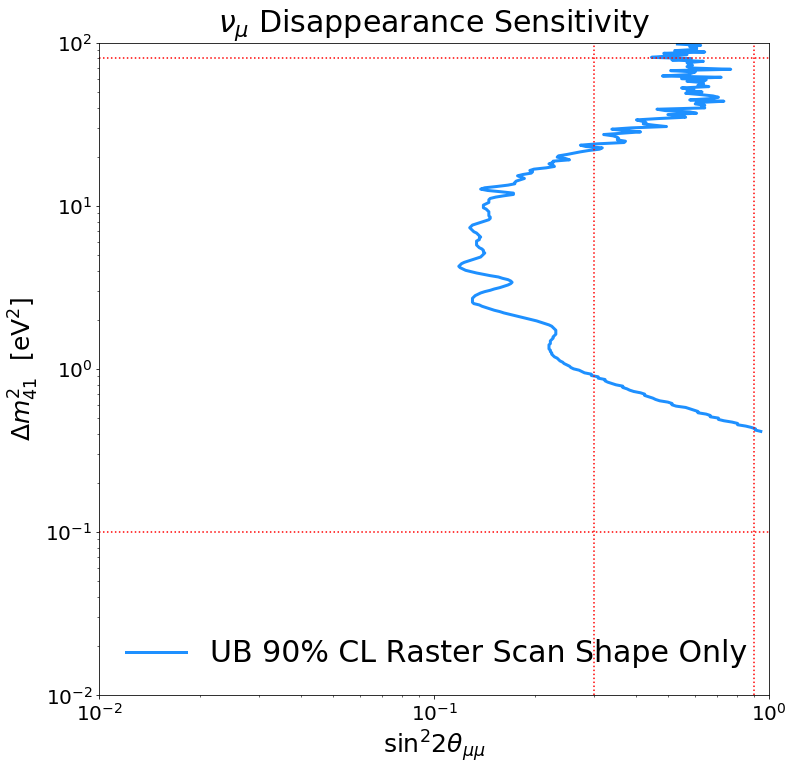

In [77]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../apr22/ubsens_so_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='dodgerblue',linewidth=3,label='UB 90% CL Raster Scan Shape Only')

ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')


ax.axvline(0.3,color='red',linestyle=':')
ax.axvline(0.9,color='red',linestyle=':')
ax.axhline(80,color='red',linestyle=':')
ax.axhline(.1,color='red',linestyle=':')

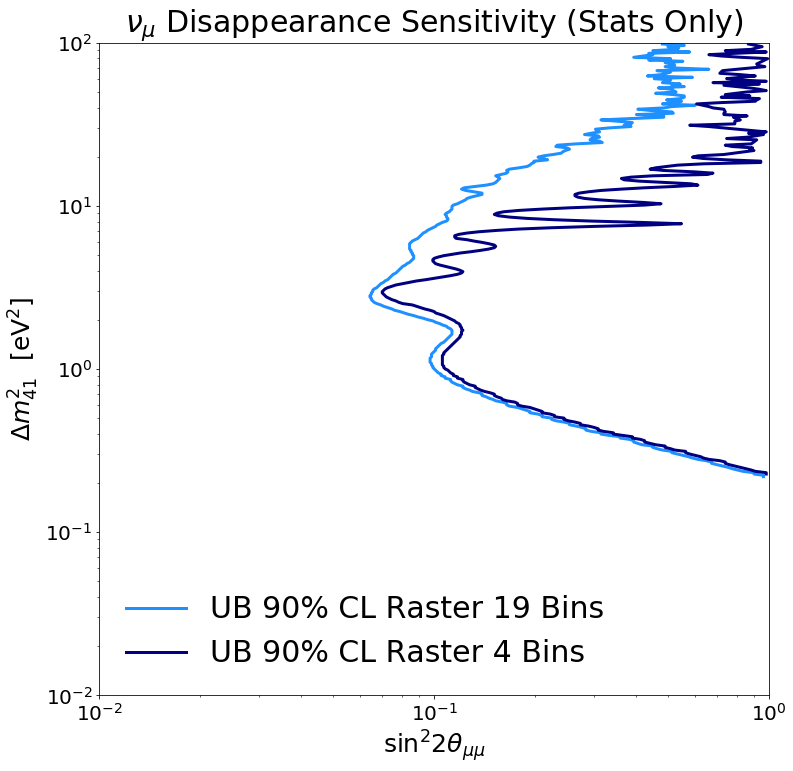

In [82]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../apr22/ubsens_so_statsonly_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='dodgerblue',linewidth=3,label='UB 90% CL Raster 19 Bins')


f = ROOT.TFile("../apr22/ubsens_so_bigbins_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='navy',linewidth=3,label='UB 90% CL Raster 4 Bins')

ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity (Stats Only)',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
ndraws = 100
eldraw = np.random.rand(ndraws)*2*np.pi

fig,ax = plt.subplots(figsize=(12,12))

_ = plt.hist(np.power(np.sin(eldraw),2),range=(0,1),bins=20)
mean = np.power(np.sin(eldraw),2).mean()
ax.axvline(mean)
print(mean)

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../apr19/ubSens_thetas_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='rebeccapurple',linewidth=3,label=r'UB 90% CL Raster Thetas')

f = ROOT.TFile("../apr19/ubSens_lepton_costheta_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='red',linewidth=3,label=r'UB 90% CL Raster Cos$\Theta_\mu$')

f = ROOT.TFile("../apr19/ubSens_muon_edep_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='green',linewidth=3,label=r'UB 90% CL Raster $T_\mu$')

f = ROOT.TFile("../apr19/ubSens_enu_1m1p_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='teal',linewidth=3,label=r'UB 90% CL Raster $E_\nu$')


ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../apr19/ubsens_thetas_statsonly_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='rebeccapurple',linewidth=3,label=r'UB 90% CL Raster Thetas')

f = ROOT.TFile("../apr19/ubsens_enu_1m1p_statsonly_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='teal',linewidth=3,label=r'UB 90% CL Raster $E_\nu$')


ax.set_title(r'$\nu_\mu$ Disappearance Sensitivity (Stats Only)',fontsize=30)
ax.legend(fontsize=30,frameon=False)

plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

In [ ]:
mindex = 474
print(a_sin22th[mindex],a_dm2[mindex])


fig,ax = plt.subplots(figsize=(14,9))
_ = plt.hist(f_chi[mindex][1:],histtype='step',bins=80,facecolor=None,linewidth=3,edgecolor='black',density=1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


#ax.set_xlim(0,10)
#ax.set_ylim(0,1)
x = np.linspace(.001,10,100)

ax.set_xlabel(r'$\Delta\chi^2_i$',fontsize=25)
ax.set_ylabel('Normalized Count',fontsize=25)


df,loc,scale = scipy.stats.distributions.chi2.fit(f_chi[mindex][1:])
fitted_data = scipy.stats.distributions.chi2.pdf(x,df,loc,scale)

twodof_data = scipy.stats.distributions.chi2.pdf(x,2,0,1)

print('dof:',df)

#plt.plot(x,fitted_data,'b-',label=r'Fitted $\chi^2$ Distribution',linewidth=3)
plt.plot(x,twodof_data,'r:',label=r'2 DoF $\chi^2$ Distribution',linewidth=3)

ax.legend(fontsize=20,frameon=False)

plt.annotate(r'$\sin^22\theta=%.2f, \Delta m^2=%.2f$'%(a_sin22th[mindex],a_dm2[mindex]),xy=(0.45, .6), xycoords='axes fraction',fontsize=30)
#plt.annotate(r'Fitted $\chi^2$ DoF: %.2f'%(df),xy=(0.5, .5), xycoords='axes fraction',fontsize=30)

In [1]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../apr22/ufLim_flux_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='dodgerblue',linewidth=3,label=r'flux sys only')

f = ROOT.TFile("../apr22/ufLim_xsec_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='indianred',linewidth=3,label=r'xsec sys only')

f = ROOT.TFile("../apr22/ufLim_detsys_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='green',linewidth=3,label=r'detector sys only')

f = ROOT.TFile("../apr22/ufLim_diagonly_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='goldenrod',linewidth=3,label=r'diagonal sys only')

f = ROOT.TFile("../apr22/ufLim_stats_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_raster")
chi2_95, dm2_95, sin22th_95 = getArrays(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='magenta',linewidth=3,label=r'stats only')

plt.annotate('No Frequentist Correction',xy=(0.1, .38), xycoords='axes fraction',fontsize=35)
ax.set_title(r'90% $\nu_\mu$ Disappearance Limit (Shape+Rate)',fontsize=30)
ax.legend(fontsize=30,frameon=False)


plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

NameError: name 'plt' is not defined

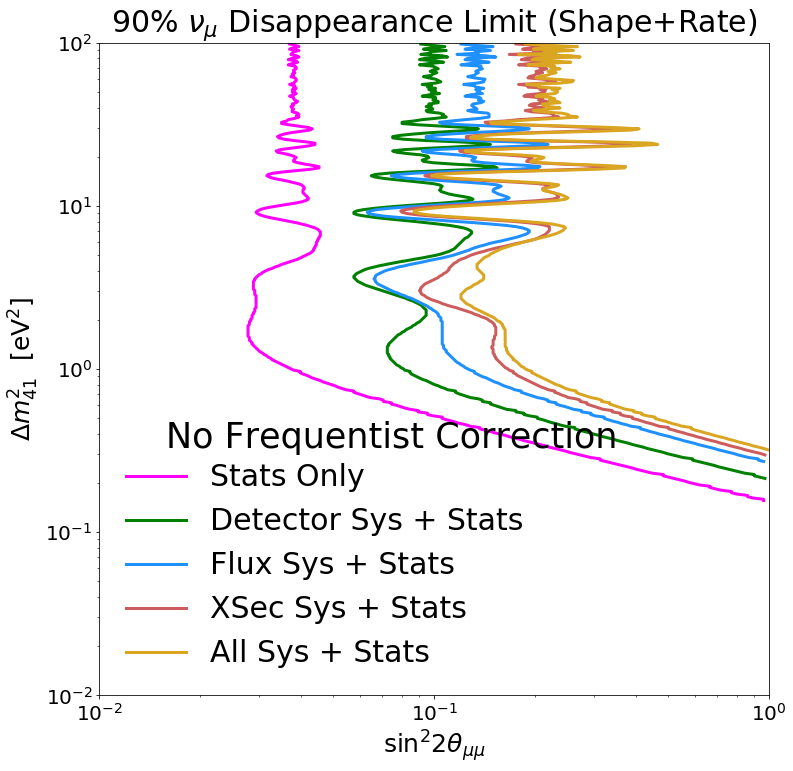

In [10]:
fig, ax = plt.subplots(figsize=(12,12))

f = ROOT.TFile("../apr28freqtest/ublim_statsonly_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContour(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='magenta',linewidth=3,label=r'Stats Only')

f = ROOT.TFile("../apr28freqtest/ublim_detsysonly_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContour(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='green',linewidth=3,label=r'Detector Sys + Stats')

f = ROOT.TFile("../apr28freqtest/ublim_fluxonly_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContour(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='dodgerblue',linewidth=3,label=r'Flux Sys + Stats')

f = ROOT.TFile("../apr28freqtest/ublim_xseconly_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContour(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='indianred',linewidth=3,label=r'XSec Sys + Stats')

f = ROOT.TFile("../apr28freqtest/ublim_sr_proc_v1.root")
tchi_95 = f.Get("numudis_90_exclusion")
sin22th_95,dm2_95 = getContour(tchi_95)        
plt.plot(sin22th_95,dm2_95,c='goldenrod',linewidth=3,label=r'All Sys + Stats')

plt.annotate('No Frequentist Correction',xy=(0.1, .38), xycoords='axes fraction',fontsize=35)
ax.set_title(r'90% $\nu_\mu$ Disappearance Limit (Shape+Rate)',fontsize=30)
ax.legend(fontsize=30,frameon=False)


plt.xlim(1e-2,1)
plt.ylim(0.01,100)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=25)
ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=25)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

# SIG INJECT